# HW2  Regression (Due: Monday, February 5, 2024, 11:59 PM)


####❗Please submit this notebook (`.ipynb`) with your solutions. The solutions should include the **code**, **explanations** (e.g. *comments*, *figure legends*), and the **output of all the cells**. Submitting your solutions without them will lead to `a deduction of points`.

####❗Also, note that you should **cite all the references** you refer to under each question. Proper referencing is essential for academic integrity, giving credit to original authors, avoiding plagiarism, and providing a traceable path for verification. `Please check the course syllabus for more details about academic integrity`.

---


#### **Q0)** [[0 point]](https://) While you are allowed to discuss homework assignments, it is essential that you write down your code and solutions yourself. If you have discussed the homework with other students, please mention their names.


\# your answer here

---

####Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues.

In [1]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

## Linear Regression

#### **Q1)** [[10 points]](https://) Implement the linear regression model discussed in class below. The function (called `model`) takes in an array of data points, `x` , and an array of weights, `w`, and returns a vector `y_predicted` containing the linear combination for each of the data points. This is the linear model we have discussed in class. You can assume each data point in `x` only has one feature.  The length of the vector being returned should be the same as `x`.


In [2]:
def model(x,w):
    
    """
    Parameters:
    x: Input data
    w: Array of weights [intercept, slope]

    Returns:
    y_predicted: Array of predicted values
    
    """
    
    y_predicted = w[0] + w[1] * x
    return y_predicted


#### **Q2)** [[10 points]](https://) Implement the least squares function discussed in class below. The function should take in an array of weights, `w`, an array of data points, `x`, and an array of the corresponding groundtruth, `y`. It should use the model function implemented above and return a float indicating the total cost.

In [3]:
def least_squares(w,x,y):
    
    """
        Inputs:
        w: array of weights
        x: array of data points
        y: array of corresponding groundtruth

        Outputs:
        cost: least squares cost
        
    """
    
    predictions = model(x, w)
    cost = np.mean(np.square(predictions - y))
    return cost


#### **Q3)** [[5 points]](https://) This one is a freebie from HW1. Copy and paste your gradient descent function here. Specifically, the one that takes in the cost function as input and return the weight and cost history. We will be using a fixed alpha for this HW. The only difference is that this function should now also take in as input an array of `x` and `y`, corresponding to our data. The `w`, `x`, and `y` are given as inputs to the cost funtion and its gradient.

In [4]:
def gradient_descent(g,alpha,max_its,w,x,y):
    
    # Initialize
    gradient = grad(g)
    weight_history = [w]
    cost_history = [g(w, x, y)]

    # Iterate
    for step in range(max_its):

        # Step
        w -= alpha * gradient(w, x, y)
        
        # Record
        cost_history.append(g(w, x, y))
        weight_history.append(w)

    return weight_history, cost_history
    

#### **Q4)** [[1 point]](https://)  Run the code below to import a dataset. Then, plot a scatter plot of the data (`x` vs `y`).

In [5]:
# import the dataset
csvname = 'kleibers_law_data2.csv'
data = np.loadtxt(csvname,delimiter=',')
x = np.log(data[:-1,:])
y = np.log(data[-1:,:])

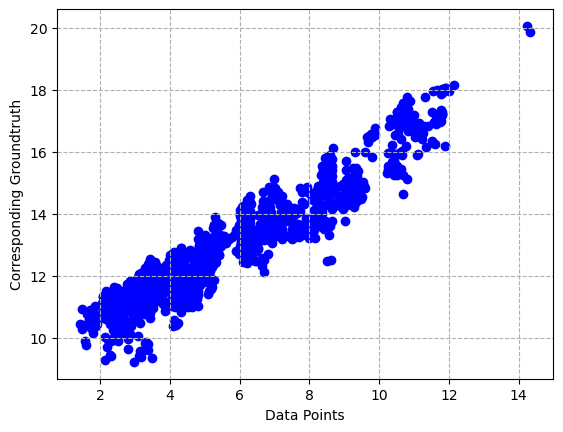

In [6]:
#Your code here

plt.scatter(x, y, color='blue')
plt.grid(linestyle="--")

plt.xlabel("Data Points")
plt.ylabel("Corresponding Groundtruth")

# plt.legend(loc="upper right")
plt.show()

#### **Q5)** [[5 points]](https://) Use your gradient descent function to learn a linear regression model for the `x` and `y` above using the following parameters and plot the `cost_history` over the 1000 iterations.

```
g = the least_squares function you implemented.

w = [w_0, w_1], where w_0 and w_1 are random numbers between -0.1 and 0.1

max_its=1000

alpha=0.01
```

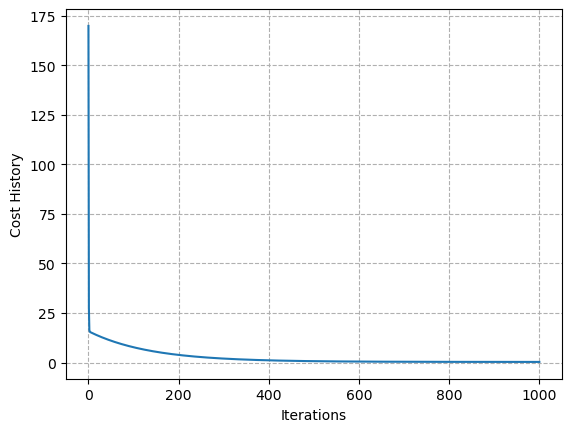

In [7]:
#Your code here

weights, costs = gradient_descent(least_squares, 0.01, 1000, np.random.uniform(-0.1, 0.1, 2), x, y)
plt.plot(list(range(len(costs))), costs)
plt.grid(linestyle="--")

plt.xlabel("Iterations")
plt.ylabel("Cost History")

# plt.legend(loc="upper right")
plt.show()

#### **Q6)** [[5 points]](https://) Use the learned weights from above (note that the "learned" weights are the ones with the lowest cost) to plot the learned line. You can use the *linspace* method (shown below) to generate a list of samples, `s`, that you can use for plotting. You need to compute the model predictions for each of the data points using the learned weights. On the same figure, also plot the scatter plot from Q4.

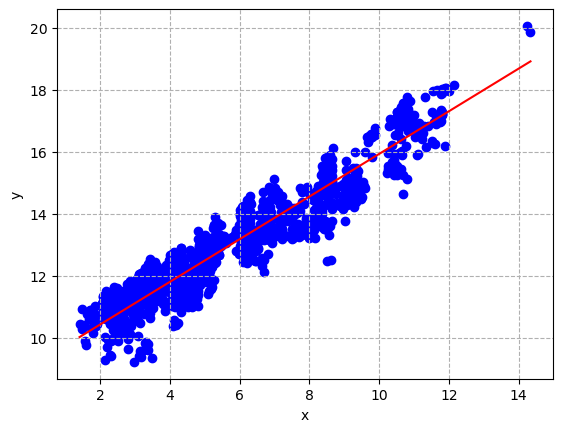

In [8]:
# Generate samples for plotting the learned line
s = np.linspace(np.min(x),np.max(x))

#Your code here
ys = model(s, weights[-1])
plt.scatter(x, y, color='blue')
plt.grid(linestyle="--")

plt.xlabel("x")
plt.ylabel("y")


plt.plot(s, ys, color='red')

plt.show()

#### **Q7)** [[1 point]](https://)  Run the code below to import a dataset. Then, plot a scatter plot of the data (`x` vs `y`).

In [9]:
# load in dataset
data = np.loadtxt('regression_outliers2.csv',delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

#Your code here

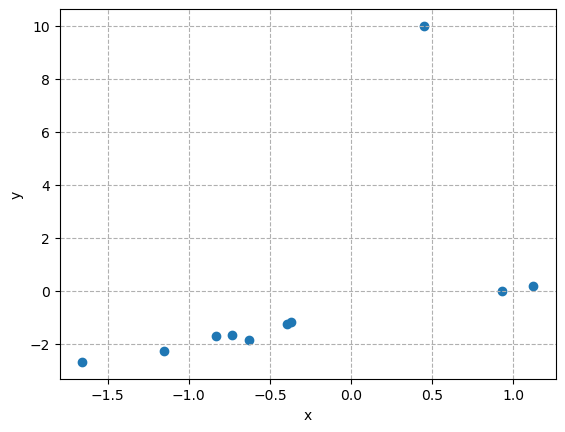

In [10]:
plt.scatter(x, y)
plt.grid(linestyle="--")

plt.xlabel("x")
plt.ylabel("y")

plt.show()

#### **Q8)** [[10 points]](https://) Implement the least absolute deviations function discussed in class. The function should take in an array of weights, `w`, an array of data points, `x`, and an array of the corresponding groundtruth, `y`. It should use the model function implemented in Q1 and return a float indicating the total cost.

In [11]:
def least_absolute_deviations(w,x,y):
    
    predictions = model(x, w)
    cost = np.mean(np.abs(predictions - y))
    
    # return float indicating total cost
    return cost


#### **Q9)** [[5 points]](https://) Use the gradient descent function twice to learn two linear models using the new `x` and `y` from Q7 using the following parameters and plot the `cost_history` for both runs on the same plot. Make the plot for the first run *`orange`* and the plot for the second run *`blue`*.

#####**Run 1)**
```
g = least_squares function

w = [0.0,0.0]

max_its=100

alpha=0.01
```

#####**Run 2)**
```
g = least_absoulte_deviations

w = [0.0,0.0]

max_its=100

alpha=0.01
```

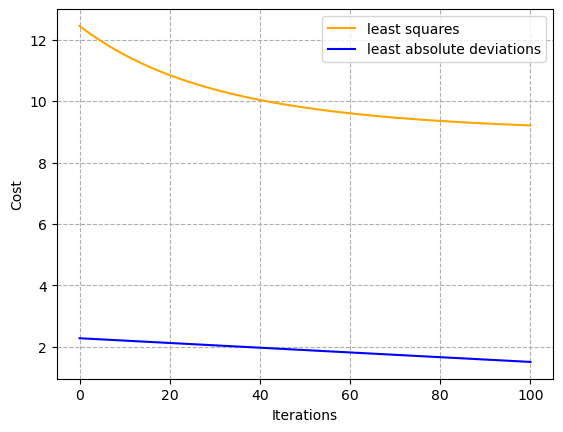

In [12]:
#Your code here

max_its = 100
alpha = 0.01
weights1, costs1 = gradient_descent(least_squares, alpha, max_its, np.array([0.0, 0.0]), x, y)
weights2, costs2 = gradient_descent(least_absolute_deviations, alpha, max_its, np.array([0.0, 0.0]), x, y)

plt.plot(list(range(len(costs1))), costs1, color="orange", label="least squares")
plt.plot(list(range(len(costs2))), costs2, color="blue", label="least absolute deviations")
plt.grid(linestyle="--")

plt.xlabel("Iterations")
plt.ylabel("Cost")

plt.legend(loc="upper right")
plt.show()

#### **Q10)** [[5 points]](https://) Use the learned weights from above to plot the two learned lines (use same colors as above). You can use the *linspace* method again to generate a list of samples that you can use. On the same figure, also plot the scatter plot from Q7. Which of these lines look like a better fit to you?


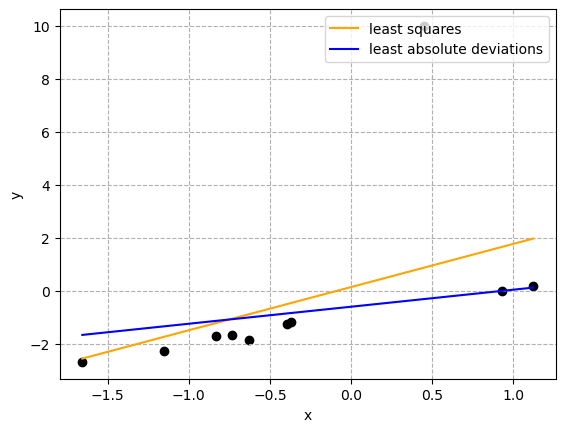

In [13]:
s = np.linspace(np.min(x),np.max(x))

#Your code here

ys1 = model(s, weights1[-1])
ys2 = model(s, weights2[-1])
plt.scatter(x, y, color="black")
plt.plot(s, ys1, color='orange', label="least squares")
plt.plot(s, ys2, color='blue', label="least absolute deviations")


plt.xlabel("x")
plt.ylabel("y")

plt.grid(linestyle="--")

plt.legend(loc="upper right")
plt.show()

The least absolute deviations line looks like a better fit.

#### **Q11)** [[6 points]](https://) Implement the mean squared error (MSE) and the mean absolute deviation (MAD) functions from class. The functions should take in as input an array of actual ys, `y_actual`, and an array of predicted ys, `y_pred`, and return the prediction error.

In [14]:
def MSE(y_actual,y_pred):
    
    #Your code here
    """
    Inputs:
        y_actual: array of actual ys
        y_pred: array of predicted ys

    Outputs:
        error: mean squared error
    """
    error = np.mean(np.square(y_actual - y_pred))
    return error

def MAD(y_actual,y_pred):
    
    #Your code here
    """
    Inputs:
        y_actual: array of actual ys
        y_pred: array of predicted ys

    Outputs:
        error: mean absolute deviation
    """
    error = np.mean(np.abs(y_actual - y_pred))
    return error


#### **Q12)** [[4 points]](https://) Use the functions above to report the MSE and MAD for the two models learned in Q9, using the `x` and `y` from Q7. You should have 4 values total, two for each model. Which model is doing better? (Note that since you are evaluating the model on the training data, this corresponds to the training error)

In [15]:
#Your code here
mse_least_squares = MSE(y, model(x, weights1[-1]))
mad_least_squares = MAD(y, model(x, weights1[-1]))

mse_least_abs_deviations = MSE(y, model(x, weights2[-1]))
mad_least_abs_deviations = MAD(y, model(x, weights2[-1]))

print(f"Mean squared error for Least Squares: \t\t\t{mse_least_squares}")
print(f"Mean absolute deviation for Least Squares: \t\t{mad_least_squares}")
print(f"Mean squared error for Least Absolute Deviations: \t{mse_least_abs_deviations}")
print(f"Mean absolute deviation for Least Absolute Deviations: \t{mad_least_abs_deviations}")

Mean squared error for Least Squares: 			9.208380672234528
Mean absolute deviation for Least Squares: 		1.6783896724905574
Mean squared error for Least Absolute Deviations: 	10.986677067814977
Mean absolute deviation for Least Absolute Deviations: 	1.509424148078382


The least absolute deviations cost function does better on the training data because it is less sensitive to outliers. On the other hand, the least-squares cost function, being more sensitive to outliers, tries to fit all the data (including outliers) and results in a higher mean absolute deviation and a generally worse fit.

## Nonlinear Regression

####**Q13)** [[5 points]](https://) Implement feature transformation function, `b()`, that takes an array of data points, `x`, and an index `i` to return an array of transformed features for `x`, where $b(x, i) = x^i$. You can assume there is only one feature for each data point.

In [16]:
def b(x, i):
    """
    Feature transformation function.
    
    Inputs:
        x: array of data points
        i: index for transformation
        
    Outputs:
        transformed_features: array of transformed features
    """
    transformed_features = np.power(x, i)
    return transformed_features


#### **Q14)** [[10 points]](https://) Implement the nonlinear regression model based on the equation below. The function (called `nonlinear_model`) takes in an array of data points, `x` , and an array of weights, `w`, and returns a vector `y_predicted` containing the linear combination for each of the data points. As discussed in class, your input `x` should be first transformed to a new feature space with the feature transformation function, `b`, you implemented in Q13. You can assume each data point in `x` only has one feature. The length of the vector being returned should be the same as `x`.

\begin{align}
f_{\mathbf{\theta}}(x)
&= w_0 + w_1 x + w_2 x^{2} + w_2 x^{3} + w_2 x^{4} \\
&= w_0 b_0(x)+ w_1 b_1(x) + w_2 b_2(x) + w_3 b_3(x) + w_4 b_4(x) \\
&= \sum_{i=0}^4 w_i b_i(x)
\end{align}


In [17]:
def nonlinear_model(x, w):
    # Create polynomial features
    transformed_features = np.array([x**i for i in range(len(w))])
    transformed_features = np.transpose(transformed_features)

    # Calculate the linear combination
    y_predicted = np.dot(transformed_features, w)

    return y_predicted


#### **Q15)** [[5 points]](https://) Complete the code below (`least_squares_nonlinear` function) by updating your `least_squares` function to utilize your `nonlinear_model`. Next, run the gradient descent function, using the `x` and `y` from Q7, with your `nonlinear_model` implemented in Q14. Use the following parameters and plot the cost_history.

```
g = least_squares_nonlinear function

w = [1.0, 1.0, 1.0, 1.0, 1.0]

max_its = 5000

alpha = 0.01
```

In [18]:
def least_squares_nonlinear(w, x, y):
    predictions = nonlinear_model(x, w)
    cost = np.mean(np.square(predictions - y))
    return cost


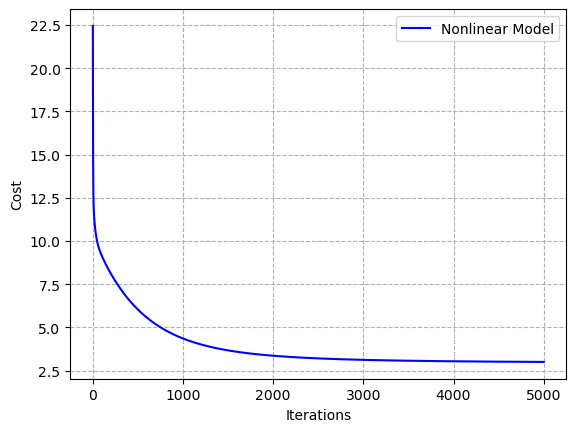

In [19]:
# Initial weights for nonlinear model
initial_weights_nonlinear = np.array([1.0, 1.0, 1.0, 1.0, 1.0])

# Reshape x to have two dimensions
x = x.reshape(-1, 1)

# Run gradient descent for the nonlinear model
weights_nonlinear, costs_nonlinear = gradient_descent(least_squares_nonlinear, alpha=0.01, max_its=5000, w=initial_weights_nonlinear, x=x, y=y)

# Plot the cost histories for both models
plt.plot(range(len(costs_nonlinear)), costs_nonlinear, color="blue", label="Nonlinear Model")
plt.grid(linestyle="--")

plt.xlabel("Iterations")
plt.ylabel("Cost")


# Add legend to the plot
plt.legend(loc="upper right")

# Show the plot
plt.show()

####**Q16)** [[5 points]](https://) Use the learned weights from above to plot the learned nonlinear model. You can use the linspace method again to generate a list of samples that you can use. On the same figure, also plot the scatter plot from Q7.

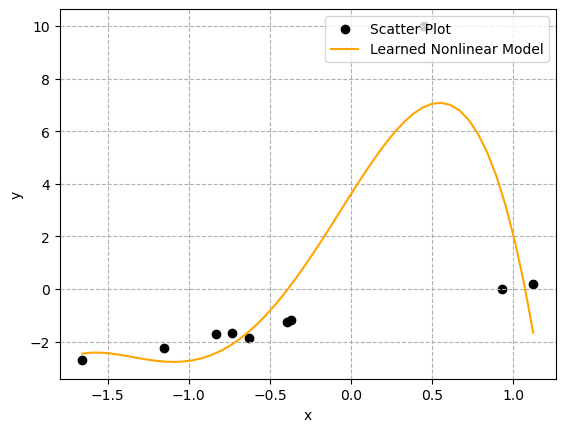

In [20]:
s = np.linspace(np.min(x),np.max(x))

# Evaluate the learned nonlinear model for the samples using the last set of weights obtained
ys_nonlinear = nonlinear_model(s, weights_nonlinear[-1])

# Plot the scatter plot from Q7
plt.scatter(x, y, color="black", label="Scatter Plot")

plt.xlabel("x")
plt.ylabel("y")


# Plot the learned nonlinear model using the last set of weights
plt.plot(s, ys_nonlinear, color='orange', label="Learned Nonlinear Model")
plt.grid(linestyle="--")

# Add legend to the plot
plt.legend(loc="upper right")

# Show the plot
plt.show()


## Regularizations

#### **Q17)** [[6 points]](https://) Implement the L1 and L2 regularizers from class. Recall the regularizers take in input the weight vector and return a score based on the L1 or L2 norm of the weights.

In [21]:
def L2_regularizer(w):
  #Your code here
    L2 = np.sum(np.square(w))
    return L2

def L1_regularizer(w):
  #Your code here
    L1 = np.sum(np.abs(w))
    return L1


#### **Q18)** [[10 points]](https://) Turn the least squares function implemented in Q2 into the Ridge (L2) and Lasso (L1) least squares (*covered in class*) using the functions implemented in Q17. Recall that $\lambda$ is used as a hyperparameter to specify the smoothness of the function learned (higher $\lambda$ leads to simpler and smoother functions whereas lower $\lambda$ leads to better fitting to the data. $\lambda=0$ is the same as non-regularized least-squares)

In [22]:
def ridge(w,x,y,lmbda=0.0):
  #your code here
    cost = least_squares(w, x, y) + lmbda * L2_regularizer(w)
    return cost

def lasso(w,x,y,lmbda=0.0):
  #your code here
    cost = least_squares(w, x, y) + lmbda * L1_regularizer(w)
    return cost


####**Q19)** [[8 points]](https://) Run the gradient descent function twice, using the `x` and `y` from Q7, with your `nonlinear_model` using the following parameters. Use the cost functions you implemented in Q18, and Plot the cost_history for both runs. Make the plot for the first run *`orange`* and the plot for the second run *`blue`*. Note that you have to also update your gradient descent function to take $\lambda$ as input.


#####**Run 1)**
```
g = ridge

w = [1.0, 1.0, 1.0, 1.0, 1.0]

max_its = 100

alpha = 0.01

lmbda = 0.1
```

####**Run 2)**
```
g = lasso

w = [1.0, 1.0, 1.0, 1.0, 1.0]

max_its = 100

alpha = 0.01

lmbda = 0.1
```

In [23]:
def ridge_nonlinear(w, x, y, lmbda=0.1):
    cost = least_squares_nonlinear(w, x, y) + lmbda * L2_regularizer(w)
    return cost

def lasso_nonlinear(w, x, y, lmbda=0.1):
    cost = least_squares_nonlinear(w, x, y) + lmbda * L1_regularizer(w)
    return cost


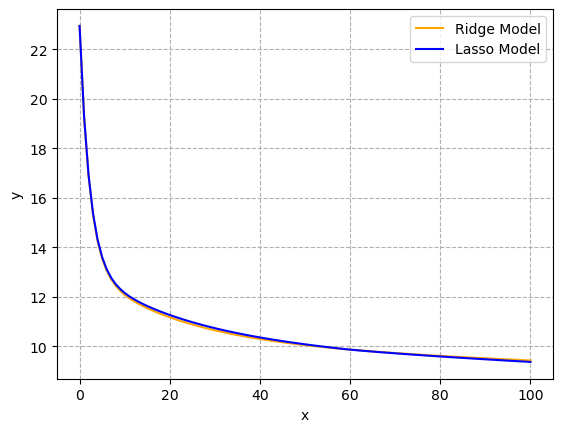

In [24]:
def gradient_descent_with_lmbda(g, alpha, max_its, w, x, y, lmbda=0.1):
    gradient = grad(g)
    weight_history = [w]
    cost_history = [g(w, x, y, lmbda)]

    for step in range(max_its):
        w -= alpha * gradient(w, x, y, lmbda)
        cost_history.append(g(w, x, y, lmbda))
        weight_history.append(w)

    return weight_history, cost_history

# Run gradient descent for the ridge model
weights_ridge, costs_ridge = gradient_descent_with_lmbda(ridge_nonlinear, alpha=0.01, max_its=100, w=np.array([1.0, 1.0, 1.0, 1.0, 1.0]), x=x, y=y, lmbda=0.1)

# Run gradient descent for the lasso model
weights_lasso, costs_lasso = gradient_descent_with_lmbda(lasso_nonlinear, alpha=0.01, max_its=100, w=np.array([1.0, 1.0, 1.0, 1.0, 1.0]), x=x, y=y, lmbda=0.1)

# Plot the cost histories for both models
plt.plot(range(len(costs_ridge)), costs_ridge, color="orange", label="Ridge Model")
plt.plot(range(len(costs_lasso)), costs_lasso, color="blue", label="Lasso Model")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(linestyle="--")
plt.legend(loc="upper right")
plt.show()

## SKLearn and Feature Selection

#### **Q20)** [[2 points]](https://) The file `'weatherHistory.csv'` has 96,454 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [25]:
import pandas as pd

file_path = '/Users/ivoryang/Downloads/HW2_Winter24 (1)/weatherHistory.csv'

# Read the data file into a pandas DataFrame
weather_data = pd.read_csv(file_path)

# Display first few rows
print(weather_data.head())


                            Date        Summary Precip  Temperature  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy   rain     9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy   rain     9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy   rain     9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy   rain     8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy   rain     8.755556   

   Apparent_Temperature  Humidity  Wind_Speed  Wind_Bearing  Visibility  \
0              7.388889      0.89     14.1197         251.0     15.8263   
1              7.227778      0.86     14.2646         259.0     15.8263   
2              9.377778      0.89      3.9284         204.0     14.9569   
3              5.944444      0.83     14.1036         269.0     15.8263   
4              6.977778      0.83     11.0446         259.0     15.8263   

   Loud_Cover  Pressure                      Daily_Summary  
0         0.0   1015.13  Partly cloudy throughout the day.  


#### **Q21)** [[5 points]](https://) Use the data above to set `y` to be the temperatures and `X` to be the following columns (in order): `[Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Pressure]` Basically, we want to see whether we can predict the temperature, using the features in `X`.

In [26]:
import pandas as pd

# Select the columns for features (X) and target variable (y)
selected_columns = ['Apparent_Temperature', 'Humidity', 'Wind_Speed', 'Wind_Bearing', 'Pressure']
X = weather_data[selected_columns]
y = weather_data['Temperature']

# Display first few rows of X and y
print("Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())


Features (X):
   Apparent_Temperature  Humidity  Wind_Speed  Wind_Bearing  Pressure
0              7.388889      0.89     14.1197         251.0   1015.13
1              7.227778      0.86     14.2646         259.0   1015.63
2              9.377778      0.89      3.9284         204.0   1015.94
3              5.944444      0.83     14.1036         269.0   1016.41
4              6.977778      0.83     11.0446         259.0   1016.51

Target Variable (y):
0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature, dtype: float64


#### We are now going to use a well-known ML library called ***sklearn***. If you do not have it installed, please do so using this instruction: https://scikit-learn.org/stable/install.html

#### sklearn comes with many models already implemented, below we import the standard linear regression, Ridge, and Lasso models from sklearn. We also import a method that can divide our data into train/test sets. Please run the cell below.

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

#### This library is very easy to use. Please use the API and user guide (https://scikit-learn.org) to learn exactly how to use this library. For instance, learning a linear regression model using sklearn can be done in two lines:

```
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)
```

#### **Q22)** [[2 points]](https://) Use the `train_test_split` to divide your modified data from Q21 into 80% train, 20% test.

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### **Q23)** [[10 points]](https://) Use sklearn to train a LinearRegression model using the data above. Report the performance of the model on the test data (use sklearn's MSE implementation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). Note that the `.predict` method can be used to get the y_predictions for the test xs.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = linear_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print("Mean Squared Error on Test Data:", mse)


Mean Squared Error on Test Data: 0.8998694775524541


#### **Q24)** [[10 points]](https://) Repeat Q23 but instead of LinearRegression, use the Ridge and Lasso functions. You can keep the default alpha (note that what we called lambda in the class, the hyperparameter for regularization, is called alpha in sklearn. It is the same thing).

In [30]:
from sklearn.linear_model import Ridge, Lasso

# Initialize the Ridge model
ridge_model = Ridge()

# Train the Ridge model on the training data
ridge_model.fit(X_train, y_train)

# Predict the target values on the test data for Ridge
y_pred_ridge = ridge_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Print the MSE for Ridge
print("Ridge - Mean Squared Error on Test Data:", mse_ridge)

# Initialize the Lasso model
lasso_model = Lasso()

# Train the Lasso model on the training data
lasso_model.fit(X_train, y_train)

# Predict the target values on the test data for Lasso
y_pred_lasso = lasso_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Print the MSE for Lasso
print("Lasso - Mean Squared Error on Test Data:", mse_lasso)

Ridge - Mean Squared Error on Test Data: 0.8998702893641076
Lasso - Mean Squared Error on Test Data: 0.9788272422479269


#### **Q25)** [[5 points]](https://) Print the learned parameters for the Ridge and Lasso models (using `.coef_`).  Note that the parameters below correspond to the feature vector (`[Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Pressure]`), in order. I.e., the first value corresponds to `Apparent_Temperature`, etc. What is the difference between the Ridge and Lasso parameters? Which features, if any, have been eliminated by Lasso?

In [31]:
# Print the learned parameters for Ridge model
print("Ridge Model Coefficients:", ridge_model.coef_)

# Print the learned parameters for Lasso model
print("Lasso Model Coefficients:", lasso_model.coef_)

Ridge Model Coefficients: [ 8.73491798e-01 -1.45297638e+00  8.01516368e-02 -3.92415120e-04
 -1.85889492e-04]
Lasso Model Coefficients: [ 8.80306700e-01 -0.00000000e+00  6.88636339e-02 -2.53472380e-04
 -1.56887212e-04]


Learned parameters for the Ridge and Lasso models:

Ridge Model Coefficients: [ 8.73491798e-01, -1.45297638e+00, 8.01516368e-02, -3.92415120e-04, -1.85889492e-04]

Lasso Model Coefficients: [ 8.80306700e-01, 0.00000000e+00, 6.88636339e-02, -2.53472380e-04, -1.56887212e-04]

Differences between Ridge and Lasso parameters:

The magnitude of coefficients in Lasso is generally slightly higher than in Ridge. Lasso tends to push some coefficients to higher magnitudes while eliminating others.

Regularization Effect: Ridge adds a penalty term proportional to the square of the magnitude of coefficients, while Lasso adds a penalty term proportional to the absolute value of coefficients. The L1 regularization in Lasso tends to encourage sparsity, leading to some coefficients being exactly zero, as seen in the case of "Humidity."

Humidity Coefficient in Lasso: The Lasso model has set the coefficient for "Humidity" to exactly zero. This indicates that the "Humidity" feature has been eliminated by Lasso, making it irrelevant for predicting the target variable.
